In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/rail-transport-infrastructure-costs/data-MYoQk.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('/kaggle/input/rail-transport-infrastructure-costs/data-MYoQk.csv')

In [4]:
data.head()

,Project title,Country,City,Environment,Line name,Description,Status,Start planning,Start Construction,End Year,...,Elevated percentage,Source,Cost (m),Currency,Year,Converted to mil GBP,CPI adjusted (mil GBP),Cost per mile (mil GBP),Source 1,Source 2
0,Broadway,Canada,Vancouver,Urban,Millenium,Extension of existing millennium line to add i...,In construction,2018,2020,2025,...,5%,Database,2830.0,CAD,2018,1637,1966,555,https://transitcosts.com/vancouver-broadway-2/,NaN
1,Vaughan,Canada,Toronto,Urban,Line 1,Extension of existing line to a new terminus,Complete,2005,2009,2017,...,0%,Database,3200.0,CAD,2013,1985,2566,480,https://transitcosts.com/toronto-vaughan/,NaN
2,Scarborough,Canada,Toronto,Urban,Line 2,Will extend existing subway to the city of Sca...,In construction,2020,2023,2030,...,0%,Database,5500.0,CAD,2018,3180,3821,789,https://transitcosts.com/toronto-scarborough-2/,NaN
3,Ontario,Canada,Toronto,Urban,Ontario Line,New line through the centre of Toronto,In construction,2019,2022,2031,...,37%,Database,19000.0,CAD,2022,11820,12884,1338,https://transitcosts.com/toronto-ontario-2/,https://www.thestar.com/news/gta/2022/11/23/on...
4,Yonge to Richmond Hill,Canada,Toronto,Urban,Line 1,Extending an existing line to new suburbs,In construction,2021,2023,2030,...,0%,Database,5600.0,CAD,2020,3256,3778,822,https://transitcosts.com/toronto-yonge-to-rich...,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Project title            138 non-null    object 
 1   Country                  138 non-null    object 
 2   City                     138 non-null    object 
 3   Environment              138 non-null    object 
 4   Line name                138 non-null    object 
 5   Description              138 non-null    object 
 6   Status                   138 non-null    object 
 7   Start planning           137 non-null    object 
 8   Start Construction       138 non-null    object 
 9   End Year                 138 non-null    object 
 10  Length (Miles)           138 non-null    float64
 11  Number of Stations       138 non-null    int64  
 12  Type of project          138 non-null    object 
 13  Type of Line             138 non-null    object 
 14  Tunnelling method        9

In [6]:
data.describe()

,Length (Miles),Number of Stations,Cost (m),Year,Converted to mil GBP,CPI adjusted (mil GBP),Cost per mile (mil GBP)
count,138.000000,138.000000,1.380000e+02,138.000000,138.000000,138.000000,138.000000
mean,16.331806,10.485507,1.280785e+05,2014.449275,2429.884058,2968.514493,371.217391
std,31.247769,12.383316,7.307356e+05,6.088247,5441.881471,6374.796669,623.070238
min,0.430000,0.000000,2.550000e+01,2000.000000,23.000000,33.000000,3.000000
25%,2.640000,2.250000,3.992500e+02,2010.250000,327.000000,428.500000,84.750000
50%,5.870000,6.000000,1.443650e+03,2015.000000,940.500000,1216.500000,186.000000
75%,11.770000,15.000000,5.575000e+03,2020.000000,2168.500000,2729.000000,431.750000
max,186.340000,68.000000,5.700000e+06,2023.000000,45000.000000,53101.000000,5244.000000


In [7]:
num_features = [feature for feature in data.columns if data[feature].dtype !='O']
print('There are {} numerical features : {}'.format(len(num_features), num_features))

There are 7 numerical features : ['Length (Miles)', 'Number of Stations', 'Cost (m)', 'Year', 'Converted to mil GBP', 'CPI adjusted (mil GBP)', 'Cost per mile (mil GBP)']


In [8]:
cat_features = [feature for feature in data.columns if data[feature].dtype =='O']
print('There are {} categorical features : {}'.format(len(cat_features), cat_features))

There are 19 categorical features : ['Project title', 'Country', 'City', 'Environment', 'Line name', 'Description', 'Status', 'Start planning', 'Start Construction', 'End Year', 'Type of project', 'Type of Line', 'Tunnelling method', 'Tunnel percentage', 'Elevated percentage', 'Source', 'Currency', 'Source 1', 'Source 2']


In [9]:
cont_features=[feature for feature in num_features if len(data[feature].unique())>=10]
print('There are {} continuous features : {}'.format(len(cont_features), cont_features))

There are 7 continuous features : ['Length (Miles)', 'Number of Stations', 'Cost (m)', 'Year', 'Converted to mil GBP', 'CPI adjusted (mil GBP)', 'Cost per mile (mil GBP)']


In [10]:
data

,Project title,Country,City,Environment,Line name,Description,Status,Start planning,Start Construction,End Year,...,Elevated percentage,Source,Cost (m),Currency,Year,Converted to mil GBP,CPI adjusted (mil GBP),Cost per mile (mil GBP),Source 1,Source 2
0,Broadway,Canada,Vancouver,Urban,Millenium,Extension of existing millennium line to add i...,In construction,2018,2020,2025,...,5%,Database,2830.0,CAD,2018,1637,1966,555,https://transitcosts.com/vancouver-broadway-2/,NaN
1,Vaughan,Canada,Toronto,Urban,Line 1,Extension of existing line to a new terminus,Complete,2005,2009,2017,...,0%,Database,3200.0,CAD,2013,1985,2566,480,https://transitcosts.com/toronto-vaughan/,NaN
2,Scarborough,Canada,Toronto,Urban,Line 2,Will extend existing subway to the city of Sca...,In construction,2020,2023,2030,...,0%,Database,5500.0,CAD,2018,3180,3821,789,https://transitcosts.com/toronto-scarborough-2/,NaN
3,Ontario,Canada,Toronto,Urban,Ontario Line,New line through the centre of Toronto,In construction,2019,2022,2031,...,37%,Database,19000.0,CAD,2022,11820,12884,1338,https://transitcosts.com/toronto-ontario-2/,https://www.thestar.com/news/gta/2022/11/23/on...
4,Yonge to Richmond Hill,Canada,Toronto,Urban,Line 1,Extending an existing line to new suburbs,In construction,2021,2023,2030,...,0%,Database,5600.0,CAD,2020,3256,3778,822,https://transitcosts.com/toronto-yonge-to-rich...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,Extension to Bourtzwiller,France,Mulhouse,Urban,Mulhouse Tram,Construction of an extension of the existing line,Complete,?,2007,2009,...,0%,Media,25.5,EUR,2009,23,33,35,https://www.railwaygazette.com/mulhouse-tram-l...,NaN
134,U4 to Eibbrucken,Germany,Hamburg,Urban,U4,Extension of the existing line,Complete,2013,2014,2018,...,0%,Database,178.0,EUR,2016,146,183,227,https://transitcosts.com/hamburg-u4-to-elbbruc...,NaN
135,U4 to HafenCity U,Germany,Hamburg,Urban,U4,Extension of the existing line,Complete,?,2007,2012,...,0%,Database,326.0,EUR,2009,290,420,173,https://transitcosts.com/hamburg-u4-to-hafenci...,NaN
136,Wehrhahn line,Germany,Dusseldorf,Urban,Wehrhahn Line,Construction of a new metro for Dusseldorf tha...,Complete,?,2007,2016,...,0%,Database,929.0,EUR,2012,753,998,472,https://transitcosts.com/dusseldorf-wehrhahn-l...,NaN


In [11]:
col_to_drop = ['Source', 'Source 1', 'Source 2', 'Tunnelling method', 'Start planning']

In [12]:
data = data.drop(columns=col_to_drop)

In [13]:
data = data.dropna()

In [14]:
#print('Percentage of unknown Start planning values:', round(((len(data[~data['Start planning'].str.isnumeric()])/len(data))*100),2) ,'%')
print('Percentage of unknown Start construction values:', round(((len(data[~data['Start Construction'].str.isnumeric()])/len(data))*100),2) ,'%')
print('Percentage of unknown End year values:', round(((len(data[~data['End Year'].str.isnumeric()])/len(data))*100),2) ,'%')

Percentage of unknown Start construction values: 2.9 %
Percentage of unknown End year values: 5.8 %


Text(0.5, 1.0, 'Construction status')

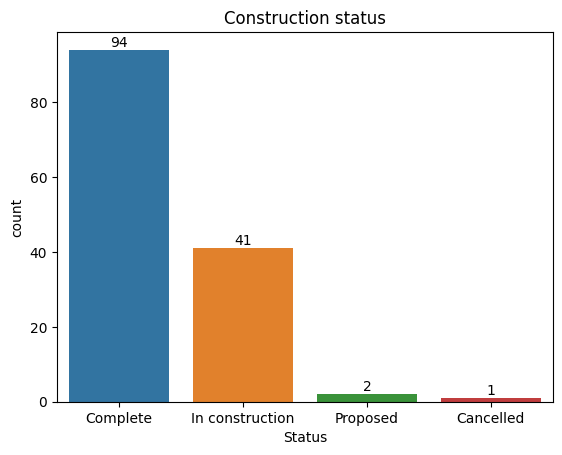

In [44]:
status_plot = sns.countplot(data=data,x='Status', order=data['Status'].value_counts().index)
status_plot.bar_label(status_plot.containers[0])
status_plot.set_title('Construction status')

In [16]:
data[data['Status']=='Cancelled']

,Project title,Country,City,Environment,Line name,Description,Status,Start Construction,End Year,Length (Miles),...,Type of project,Type of Line,Tunnel percentage,Elevated percentage,Cost (m),Currency,Year,Converted to mil GBP,CPI adjusted (mil GBP),Cost per mile (mil GBP)
106,Leeds Supertram,UK,Leeds,Urban,Leeds Supertram,"Proposed 3 line tram network in Leeds, cancell...",Cancelled,X,X,17.0,...,New Line,Tram,0%,0%,1000.0,GBP,2005,1000,1603,94


In [17]:
data[data['Status']=='Proposed']

,Project title,Country,City,Environment,Line name,Description,Status,Start Construction,End Year,Length (Miles),...,Type of project,Type of Line,Tunnel percentage,Elevated percentage,Cost (m),Currency,Year,Converted to mil GBP,CPI adjusted (mil GBP),Cost per mile (mil GBP)
81,Line 2 -phase 1-2,Italy,Turin,Urban,Line 2,New Y shaped line that will run automatic trai...,Proposed,2024,2030,5.84,...,New Line,Medium-capacity rapid transit,100%,0%,1828.0,EUR,2020,1625,1885,323
120,Extension to Wolverhampton Rail station,UK,Wolverhampton,Urban,Line 1,Extension of existing tramline to wolverhampto...,Proposed,2015,2023,0.43,...,Line extension,Tram,0%,0%,50.0,GBP,2022,50,55,125


In [18]:
data[~data['Start Construction'].str.isnumeric()]

,Project title,Country,City,Environment,Line name,Description,Status,Start Construction,End Year,Length (Miles),...,Type of project,Type of Line,Tunnel percentage,Elevated percentage,Cost (m),Currency,Year,Converted to mil GBP,CPI adjusted (mil GBP),Cost per mile (mil GBP)
103,Electrifying RER Line E,France,Paris,Urban,RER E,Electrifying RER Line E,Complete,?,2023,17.390000,...,Electrification,heavy rail,0%,0%,144.0,EUR,2023,125,125,7
104,London to Corby Electrification,UK,London-Corby,Suburban,Midland Main Line,London to Corby Electrification,Complete,?,2021,59.627329,...,Electrification,heavy rail,0%,0%,300.0,GBP,2021,300,345,6
106,Leeds Supertram,UK,Leeds,Urban,Leeds Supertram,"Proposed 3 line tram network in Leeds, cancell...",Cancelled,X,X,17.000000,...,New Line,Tram,0%,0%,1000.0,GBP,2005,1000,1603,94
127,Valenciennes Tramway Line 1,France,Valenciennes,Urban,Line 1,Construction of two tramlines for the city of ...,Complete,?,2006,5.900000,...,New Line,Tram,0%,0%,242.8,EUR,2006,166,260,44


In [19]:
data[~data['End Year'].str.isnumeric()]

,Project title,Country,City,Environment,Line name,Description,Status,Start Construction,End Year,Length (Miles),...,Type of project,Type of Line,Tunnel percentage,Elevated percentage,Cost (m),Currency,Year,Converted to mil GBP,CPI adjusted (mil GBP),Cost per mile (mil GBP)
88,Second Trunk Line,Germany,Munich,Urban,S-Bahn,New double track commuter rail tunnel in Munic...,In construction,2016,?,4.470000,...,New tunnel,heavy rail,100%,0%,3849.0,EUR,2020,3421,3970,888
91,Valley Line Southeast,Canada,Edmonton,Urban,Valley Line,New tram line for the Southeast of the city,In construction,2016,?,8.140000,...,New Line,Tram,3%,0%,1800.0,CAD,2019,1063,1254,154
96,Line from Wednesbury to Brierley Hill,UK,Birmingham,Suburban,Line 2,New Midland metro extension,In construction,2017,?,6.800000,...,New Line,Tram,0%,0%,550.0,GBP,2022,550,600,88
101,Electrifying the Wigan to Bolton line,UK,Wigan-Bolton,Suburban,Wigan to Bolton,Electrifying the Wigan to Bolton line,In construction,2023,?,9.000000,...,Electrification,heavy rail,0%,0%,78.0,GBP,2023,78,78,9
106,Leeds Supertram,UK,Leeds,Urban,Leeds Supertram,"Proposed 3 line tram network in Leeds, cancell...",Cancelled,X,X,17.000000,...,New Line,Tram,0%,0%,1000.0,GBP,2005,1000,1603,94
109,Extension Wednesbury to Brierly Hill,UK,Birmingham,Urban,Line 2,New tram extension following old metro tracks,In construction,2017,?,6.800000,...,New Line,Tram,0%,0%,550.0,GBP,2022,550,600,88
112,GTX,South Korea,Seoul,Urban,GTX B,New high speed commuter rail services to conne...,In construction,2023,?,49.689441,...,New Line,heavy rail,100%,0%,5700000.0,WON,2021,3618,4161,84
113,GTX,South Korea,Seoul,Urban,GTX C,New high speed commuter rail services to conne...,In construction,2022,?,46.459627,...,New Line,heavy rail,100%,0%,4300000.0,WON,2021,2730,3139,68


In [20]:
country_by_cost = data.groupby('Country')['Converted to mil GBP'].sum().sort_values(ascending=False)
country_by_cost

Country
UK             74011
France         58894
US             42797
Canada         37111
Singapore      27618
Australia      23004
Italy          16094
Japan          13884
Spain          11019
Germany        10167
South Korea     9395
Sweden          6235
Denmark         2735
Norway          2360
Name: Converted to mil GBP, dtype: int64

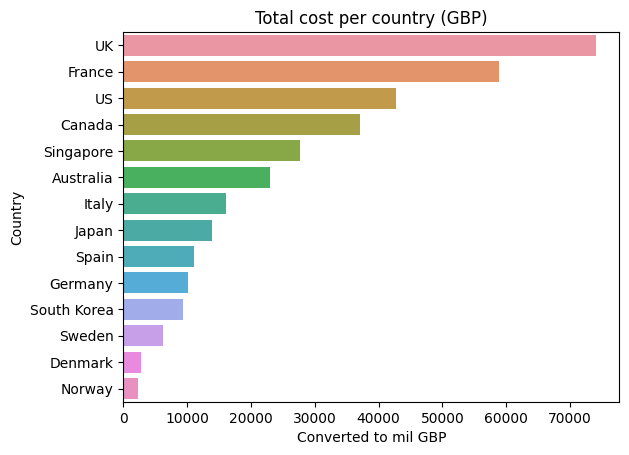

In [21]:
plot1 = sns.barplot(y=country_by_cost.index, x=country_by_cost).set(title='Total cost per country (GBP)')

In [30]:
country_by_stations = data.groupby('Country')['Number of Stations'].sum().sort_values(ascending=False)

Text(0.5, 1.0, 'Total constructions per country (GBP)')

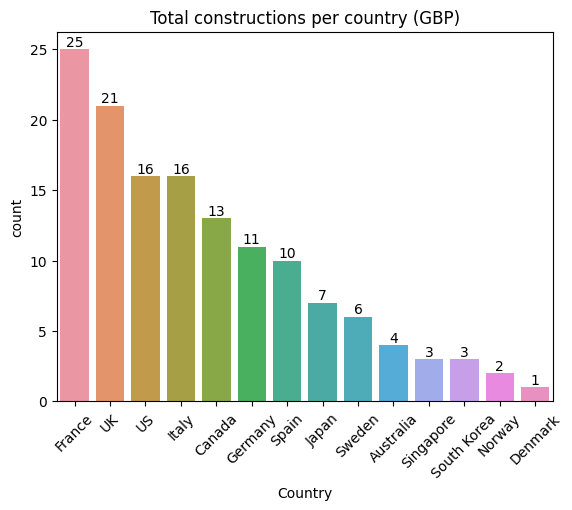

In [45]:
plot2 = sns.countplot(data=data, x='Country', order = data['Country'].value_counts().index)
plot2.bar_label(plot2.containers[0])
plot2.set_xticklabels(plot2.get_xticklabels(), rotation=45)
plot2.set_title('Total constructions per country (GBP)')

Text(0.5, 1.0, 'Stations per country')

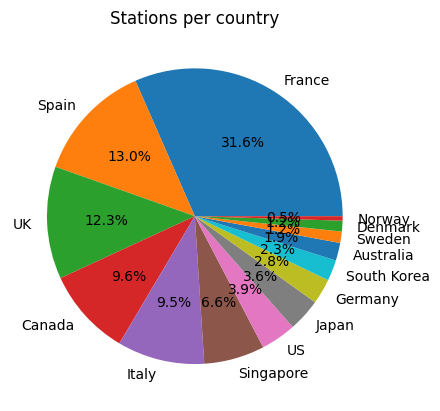

In [41]:
plot3 = plt.pie(country_by_stations, labels=country_by_stations.index, autopct='%1.1f%%')
plt.title('Stations per country')

Text(0.5, 1.0, 'Sum of each environment')

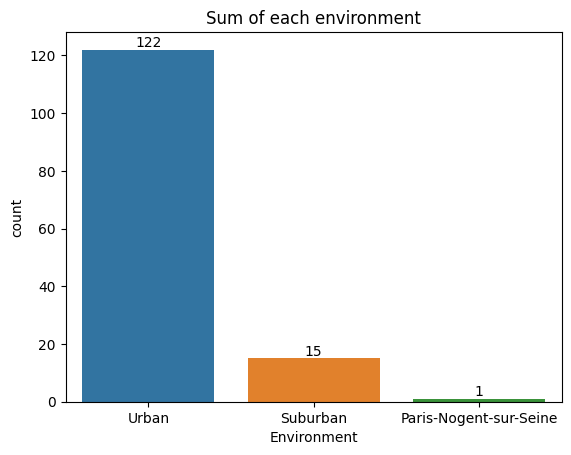

In [46]:
environment_plot = sns.countplot(data=data,x='Environment')
environment_plot.bar_label(environment_plot.containers[0])
environment_plot.set_title('Sum of each environment')